In [1]:
# for numerical computing
import numpy as np
# for dataframes
import pandas as pd
# for easier visualization
import seaborn as sns
# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#reading the csv file and printing the data
data=pd.read_csv('C:/Users/Dell PC/Desktop/ProjectSummer/kidney_disease.csv')
print("Size of data is:",data.shape)
data.columns

Size of data is: (400, 26)


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Exploratory Data Analysis

Filtering the categorical data

In [4]:
data.describe(include=['object'])

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,44,92,49,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,52,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,248


In [5]:
#when we observe the data the colulmns 'pcv','rc','wc' are having
#numerical data but their data is being given as object
#let us have a look at their data
print("pcv value counts:\n",data['pcv'].value_counts())
print("rc value counts:\n",data['rc'].value_counts())
print("wc value counts:\n",data['wc'].value_counts())

pcv value counts:
 52      21
41      21
48      19
44      19
40      16
43      14
42      13
45      13
32      12
36      12
28      12
33      12
50      12
37      11
34      11
30       9
35       9
29       9
46       9
31       8
39       7
24       7
26       6
38       5
49       4
51       4
47       4
54       4
53       4
22       3
27       3
25       3
19       2
23       2
\t43     1
18       1
16       1
9        1
17       1
15       1
20       1
14       1
\t?      1
21       1
Name: pcv, dtype: int64
rc value counts:
 5.2    18
4.5    16
4.9    14
4.7    11
3.9    10
4.8    10
4.6     9
3.4     9
5.5     8
5.9     8
6.1     8
3.7     8
5.0     8
5.8     7
5.4     7
5.3     7
3.8     7
5.6     6
4.2     6
4.3     6
4.4     5
3.2     5
4.1     5
5.1     5
5.7     5
6.4     5
6.5     5
6.2     5
6.0     4
3.6     4
6.3     4
3.5     3
4.0     3
4       3
3.3     3
2.5     2
3.0     2
2.1     2
2.6     2
2.9     2
2.7     2
5       2
2.8     2
3.1     2
3       1
2.4  

In [6]:
#replacing the unknown values in these columns
data['pcv']=data['pcv'].replace('\t?',np.nan)
data['pcv']=data['pcv'].replace('\t43',43)
data['wc']=data['wc'].replace('\t8400',8400)
data['wc']=data['wc'].replace('\t6200',6200)
data['wc']=data['wc'].replace('\t?',np.nan)
data['rc']=data['rc'].replace('\t?',np.nan)

In [7]:
#let us check the data type of these columns again
print(data['pcv'].dtype)
print(data['wc'].dtype)
print(data['rc'].dtype)

object
object
object


In [8]:
#converting the string type into numeric data of the specific columns--pcv,rc,wc
for x in data['pcv']:
    if type(x)!=float:
        data['pcv']=data['pcv'].replace(x,int(x))
for x in data['wc']:
    if type(x)!=float:
        data['wc']=data['wc'].replace(x,int(x))
for x in data['rc']:
    if type(x)!=float:
        data['rc']=data['rc'].replace(x,float(x))

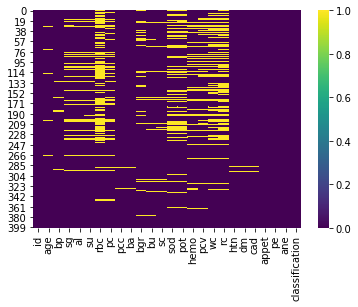

In [9]:
#Examining the null values using heatmap
#here the yellow represents 1 i.e,null values present in the data
sns.heatmap(data.isnull(),cmap='viridis')

In [10]:
#finding the null values column by column using isnull().sum()
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# Finding out the mode value of categorical data

In [11]:
#for columns having categorical data let us replace the null values with mode values of their columns
#printing the discrete values of diff columns
print("rbc:\n",data['rbc'].value_counts())
print('pc:\n',data['pc'].value_counts())
print('pcc:\n',data['pcc'].value_counts())
print('ba:\n',data['ba'].value_counts())
print('htn:\n',data['htn'].value_counts())
print('dm:\n',data['dm'].value_counts())
print('cad:\n',data['cad'].value_counts())
print('appet:\n',data['appet'].value_counts())
print('pe:\n',data['pe'].value_counts())
print('ane:\n',data['ane'].value_counts())

rbc:
 normal      201
abnormal     47
Name: rbc, dtype: int64
pc:
 normal      259
abnormal     76
Name: pc, dtype: int64
pcc:
 notpresent    354
present        42
Name: pcc, dtype: int64
ba:
 notpresent    374
present        22
Name: ba, dtype: int64
htn:
 no     251
yes    147
Name: htn, dtype: int64
dm:
 no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64
cad:
 no      362
yes      34
\tno      2
Name: cad, dtype: int64
appet:
 good    317
poor     82
Name: appet, dtype: int64
pe:
 no     323
yes     76
Name: pe, dtype: int64
ane:
 no     339
yes     60
Name: ane, dtype: int64


# Replacing the null values

replacing the null values of categorical data with mode values of their specific columns

In [12]:
data['rbc'].fillna('normal',inplace=True)
data['pc'].fillna('normal',inplace=True)
data['pcc'].fillna('notpresent',inplace=True)
data['ba'].fillna('notpresent',inplace=True)
data['htn'].fillna('no',inplace=True)
data['dm'].fillna('no',inplace=True)
data['cad'].fillna('no',inplace=True)
data['appet'].fillna('good',inplace=True)
data['pe'].fillna('no',inplace=True)
data['ane'].fillna('no',inplace=True)

replacing the null values in other columns with mean values

In [13]:
data.fillna(data.mean(),inplace=True)

In [14]:
#let us find out if there are any other null values
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

heatmap representation of presence of null values

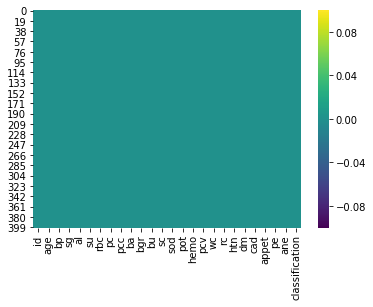

In [15]:
sns.heatmap(data.isnull(),cmap='viridis')

# Encoding the categorical data values

In [16]:
enc= {"rbc":{"normal": 1, "abnormal": 0},
      "pc": {"normal": 1, "abnormal": 0},
      "pcc": {"present": 1, "notpresent": 0},
      "ba": {"present": 1, "notpresent": 0},
      "htn": {"yes": 1, "no": 0},
      "dm": {"yes": 1, "no": 0,"\tno":0,"\tyes":1," yes":1},
      "cad": {"yes": 1, "no": 0,"\tno":0},
      "appet": {"good": 1, "poor": 0},
      "pe": {"yes": 1, "no": 0},
      "ane": {"yes": 1, "no": 0},
      "classification":{"ckd":1,"notckd":0,"ckd\t":1}}
data.replace(enc, inplace=True)

In [17]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


# Plotting for understanding and visualising the data

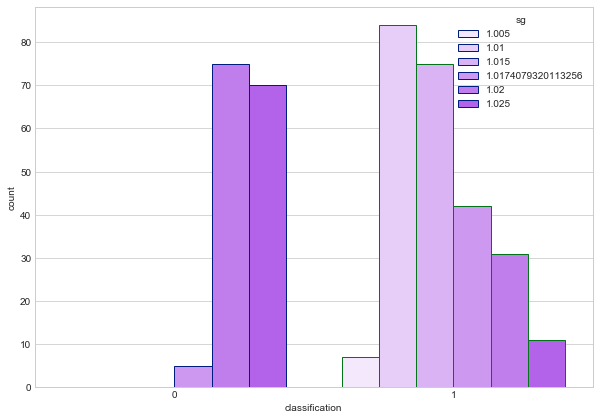

In [18]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,7))
sns.countplot(x='classification',hue='sg',data=data,color='#b84dff',edgecolor=sns.color_palette("dark", 3))

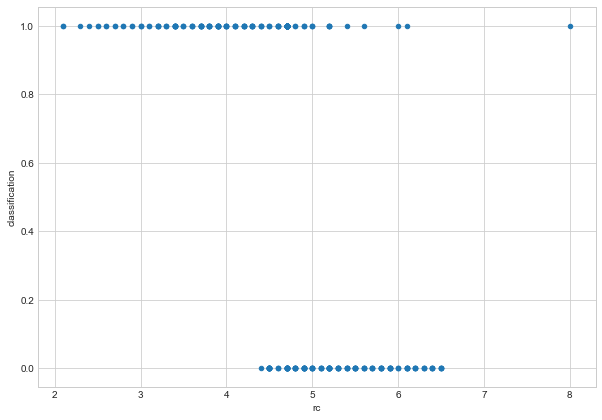

In [19]:
data.plot(kind='scatter',x='rc',y='classification',figsize=(10,7))

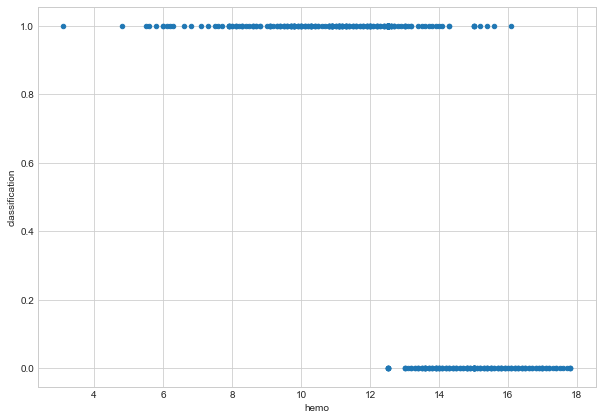

In [20]:
data.plot(kind='scatter',x='hemo',y='classification',figsize=(10,7))

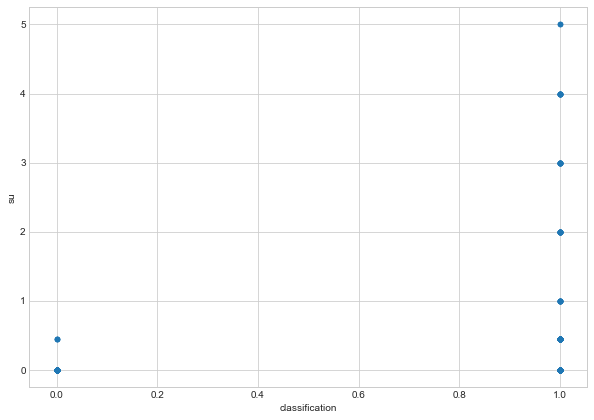

In [21]:
data.plot(kind='scatter',x='classification',y='su',figsize=(10,7))

# Correlations

*Finally, let's take a look at the relationships between numeric features and other numeric features.

*Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.

*Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.

*Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.

*Correlations near -1 or 1 indicate a strong relationship.

*Those closer to 0 indicate a weak relationship.

*0 indicates no relationship.

In [22]:
data.corr()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.000000,-0.184043,-0.243732,0.613623,-0.520040,-0.271330,0.231457,0.335825,-0.264142,-0.115955,...,0.581242,-0.174804,0.515032,-0.520089,-0.475106,-0.205575,0.374394,-0.308120,-0.273096,-0.838528
age,-0.184043,1.000000,0.148004,-0.180570,0.114764,0.207857,-0.011783,-0.101951,0.159074,0.043573,...,-0.211805,0.100061,-0.201051,0.393440,0.363475,0.232951,-0.157741,0.094434,0.050567,0.225405
bp,-0.243732,0.148004,1.000000,-0.182463,0.146593,0.200784,-0.151369,-0.156856,0.059560,0.112173,...,-0.292714,0.026067,-0.220822,0.270447,0.228250,0.086618,-0.177601,0.054083,0.194962,0.290600
sg,0.613623,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,0.236228,0.345325,-0.290663,-0.220792,...,0.528437,-0.201311,0.466976,-0.366959,-0.393190,-0.154803,0.246822,-0.272476,-0.213276,-0.698957
al,-0.520040,0.114764,0.146593,-0.466698,1.000000,0.268070,-0.373927,-0.535157,0.399749,0.367855,...,-0.527242,0.200443,-0.454886,0.481724,0.378042,0.236745,-0.330562,0.440893,0.282305,0.599238
su,-0.271330,0.207857,0.200784,-0.287993,0.268070,1.000000,-0.074324,-0.168826,0.151445,0.107684,...,-0.202573,0.153274,-0.182278,0.293179,0.472330,0.246702,-0.080648,0.130721,0.066348,0.327812
rbc,0.231457,-0.011783,-0.151369,0.236228,-0.373927,-0.074324,1.000000,0.377394,-0.102948,-0.184402,...,0.280958,-0.002207,0.202455,-0.140538,-0.145646,-0.111493,0.160868,-0.199285,-0.107625,-0.282642
pc,0.335825,-0.101951,-0.156856,0.345325,-0.535157,-0.168826,0.377394,1.000000,-0.520118,-0.330401,...,0.418580,-0.107886,0.383240,-0.291719,-0.201032,-0.172295,0.274985,-0.350227,-0.260566,-0.375154
pcc,-0.264142,0.159074,0.059560,-0.290663,0.399749,0.151445,-0.102948,-0.520118,1.000000,0.275082,...,-0.294242,0.163456,-0.267982,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,-0.115955,0.043573,0.112173,-0.220792,0.367855,0.107684,-0.184402,-0.330401,0.275082,1.000000,...,-0.189822,0.103546,-0.192222,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871


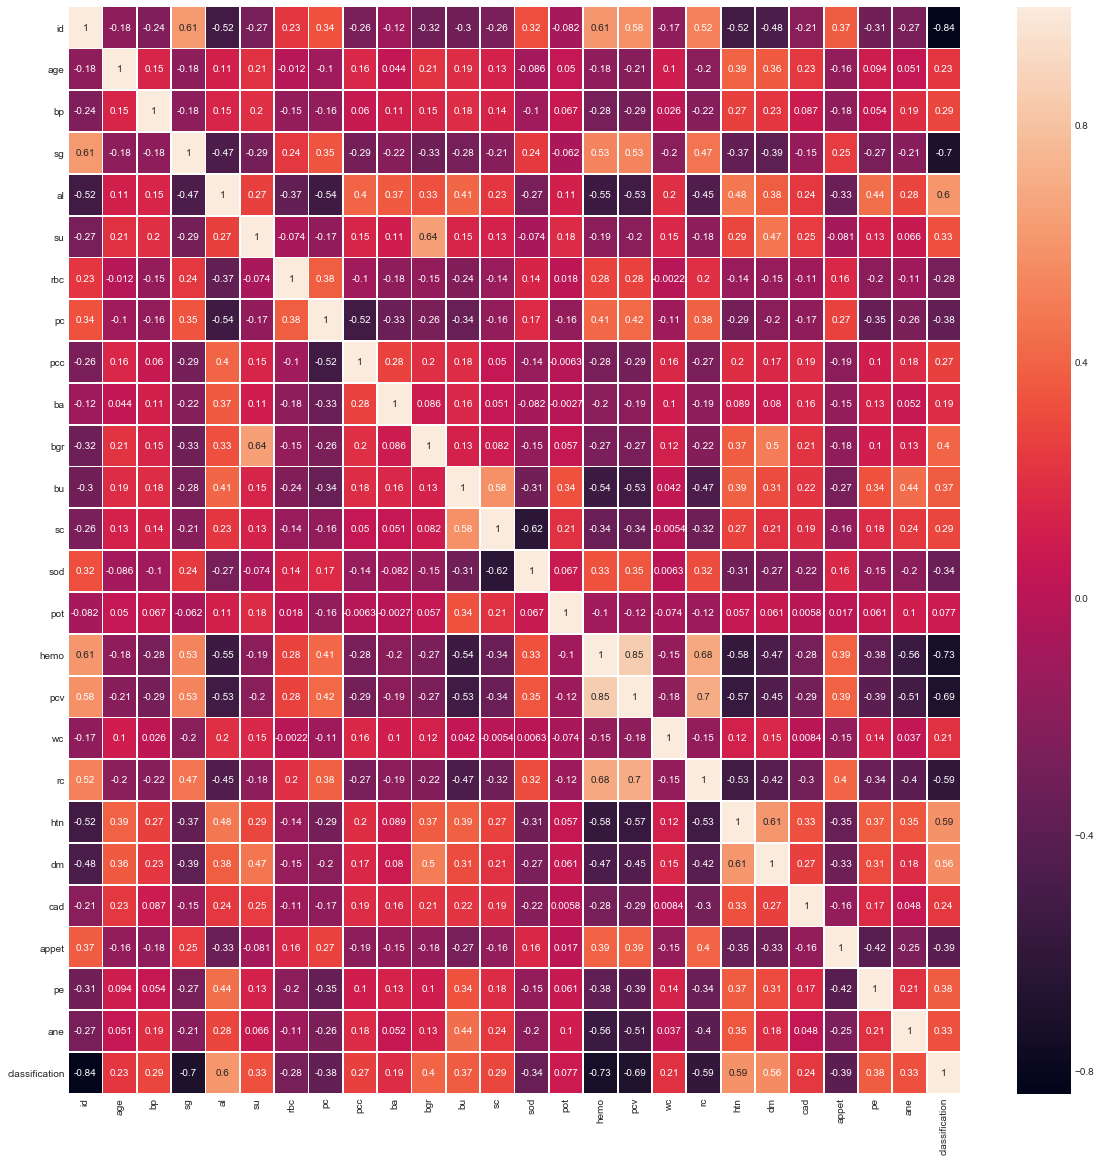

In [230]:
#Examining the heatmap
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.8)

In [24]:
#data.plot(kind='scatter',y='classification',x='pot',figsize=(10,7))

In [193]:
datan=data.drop(columns=['id'])
datan.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


# Machine Learning Models
Data Preparation

In [194]:
ar=datan.values
# Create separate object for input features
x=ar[:,0:24]
# Create separate object for target variable
y=ar[:,24]

In [195]:
# to split train and test set
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Model-1 Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
prediction=lr.predict(X_test)
from sklearn.metrics import accuracy_score
np.set_printoptions(precision=10)
accuracy_score(Y_test,prediction)

0.9666666666666667

In [197]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[49,  1],
       [ 3, 67]], dtype=int64)

In [198]:
#predicting accuracy
(49+67)/(49+1+3+67)

0.9666666666666667

In [199]:
#error
(1+3)/(49+1+3+67)

0.03333333333333333

Text(0.5,1,'Graph between Y_test and Y_pred')

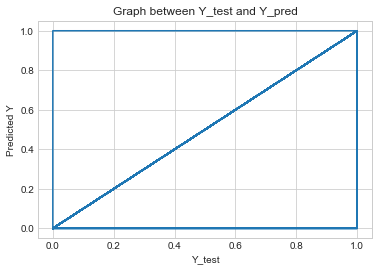

In [249]:
plt.plot(Y_test,prediction)
plt.xlabel("Y_test")
plt.ylabel("Predicted Y")
plt.title("Graph between Y_test and Y_pred")

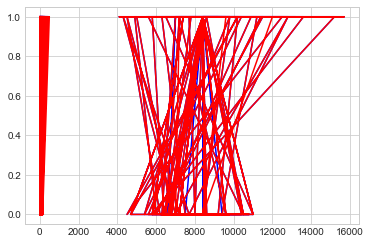

In [248]:
plt.plot(X_test,Y_test,color='blue')
plt.plot(X_test,prediction,color='red')

# Model2-SupportVectorMachine-classifier

In [231]:
#Support Vector Machine
from sklearn.svm import SVC
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7)
model_s = SVC()
results = model_selection.cross_val_score(model_s, x, y, cv=kfold)
print(results.mean()*100)

62.5


# Model 3- Naive Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 
NY_predict=gnb.predict(X_test)
print(accuracy_score(Y_test,NY_predict)*100)

95.83333333333334


# Model 4 - Decision Tree

In [237]:
from sklearn.tree import DecisionTreeClassifier
model_d = DecisionTreeClassifier()
model_d.fit(X_train,Y_train)
Y_pred=model_d.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.9583333333333334

# Model 5 - KNN Classifier

In [240]:
from sklearn.neighbors import KNeighborsClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
model_k = KNeighborsClassifier()
results = model_selection.cross_val_score(model_k,x,y, cv=kfold)
print(results.mean()*100)

69.5


# Model 6- Random Forest Classifier

In [242]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=12,max_features=3)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
print(accuracy_score(Y_test,Y_prediction)*100)

100.0
